In [1]:
import pandas as pd
import numpy as np
import nltk
import string
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

In [2]:
# Download stopwords
nltk.download('stopwords')
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [3]:
data = pd.read_csv("spam.csv", encoding='latin-1')
print(data.head())

     v1                                                 v2 Unnamed: 2  \
0   ham  Go until jurong point, crazy.. Available only ...        NaN   
1   ham                      Ok lar... Joking wif u oni...        NaN   
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...        NaN   
3   ham  U dun say so early hor... U c already then say...        NaN   
4   ham  Nah I don't think he goes to usf, he lives aro...        NaN   

  Unnamed: 3 Unnamed: 4  
0        NaN        NaN  
1        NaN        NaN  
2        NaN        NaN  
3        NaN        NaN  
4        NaN        NaN  


In [4]:
# Drop unnecessary columns
data = data[['v1', 'v2']]
data.columns = ['label', 'message']

In [5]:
def preprocess_text(text):
    text = text.lower()
    text = ''.join([char for char in text if char not in string.punctuation])
    words = text.split()
    words = [word for word in words if word not in stopwords.words('english')]
    return ' '.join(words)

data['cleaned_message'] = data['message'].apply(preprocess_text)

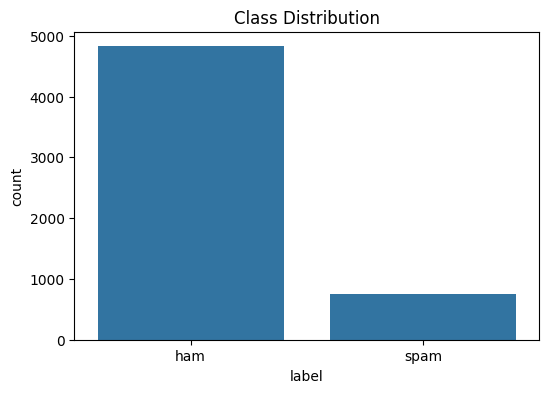

In [6]:
# Visualize the class distribution
plt.figure(figsize=(6, 4))
sns.countplot(x='label', data=data)
plt.title('Class Distribution')
plt.show()

In [7]:
# Feature extraction using TF-IDF
tfidf = TfidfVectorizer()
X = tfidf.fit_transform(data['cleaned_message'])
y = data['label'].map({'ham': 0, 'spam': 1})

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [10]:
def train_and_evaluate_model(model, model_name):
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)

    print(f"{model_name} Classifier Report")
    print(classification_report(y_test, predictions))
    accuracy = accuracy_score(y_test, predictions)
    print(f"Accuracy: {accuracy}\n")

    cm = confusion_matrix(y_test, predictions)
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Ham', 'Spam'], yticklabels=['Ham', 'Spam'])
    plt.title(f'{model_name} Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

    return predictions, accuracy

Naive Bayes Classifier Report
              precision    recall  f1-score   support

           0       0.96      1.00      0.98       965
           1       1.00      0.75      0.85       150

    accuracy                           0.97      1115
   macro avg       0.98      0.87      0.92      1115
weighted avg       0.97      0.97      0.96      1115

Accuracy: 0.9659192825112107



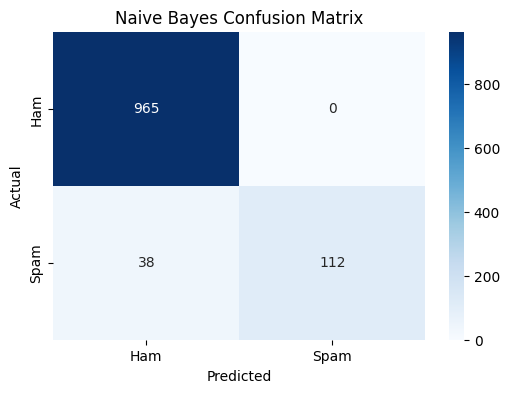

In [11]:
# Naive Bayes Classifier
nb_model = MultinomialNB()
nb_predictions, nb_accuracy = train_and_evaluate_model(nb_model, "Naive Bayes")

Logistic Regression Classifier Report
              precision    recall  f1-score   support

           0       0.94      1.00      0.97       965
           1       0.96      0.60      0.74       150

    accuracy                           0.94      1115
   macro avg       0.95      0.80      0.85      1115
weighted avg       0.94      0.94      0.94      1115

Accuracy: 0.9426008968609866



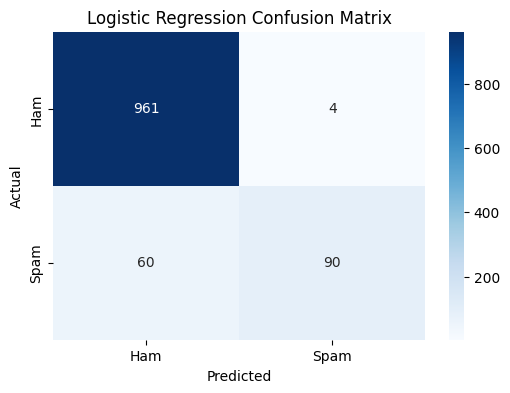

In [12]:
# Logistic Regression
lr_model = LogisticRegression(max_iter=1000)
lr_predictions, lr_accuracy = train_and_evaluate_model(lr_model, "Logistic Regression")

Support Vector Machine (SVM) Classifier Report
              precision    recall  f1-score   support

           0       0.97      1.00      0.98       965
           1       0.98      0.77      0.87       150

    accuracy                           0.97      1115
   macro avg       0.97      0.89      0.92      1115
weighted avg       0.97      0.97      0.97      1115

Accuracy: 0.967713004484305



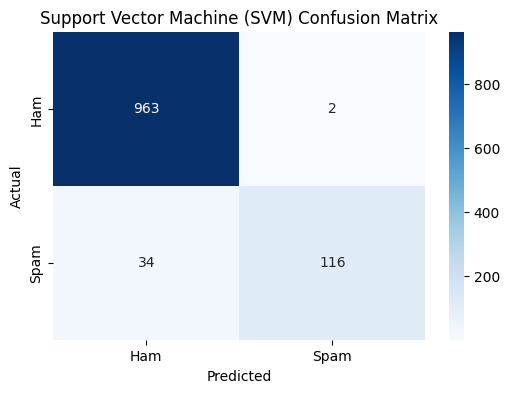

In [13]:
# Support Vector Machine (SVM)
svm_model = SVC()
svm_predictions, svm_accuracy = train_and_evaluate_model(svm_model, "Support Vector Machine (SVM)")

In [14]:
accuracy_comparison = pd.DataFrame({
    'Model': ['Naive Bayes', 'Logistic Regression', 'Support Vector Machine'],
    'Accuracy': [nb_accuracy, lr_accuracy, svm_accuracy]
})

print("\nAccuracy Comparison:")
print(accuracy_comparison)


Accuracy Comparison:
                    Model  Accuracy
0             Naive Bayes  0.965919
1     Logistic Regression  0.942601
2  Support Vector Machine  0.967713


<ipython-input-15-6c0d39bf4237>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Accuracy', y='Model', data=accuracy_comparison, palette='viridis')


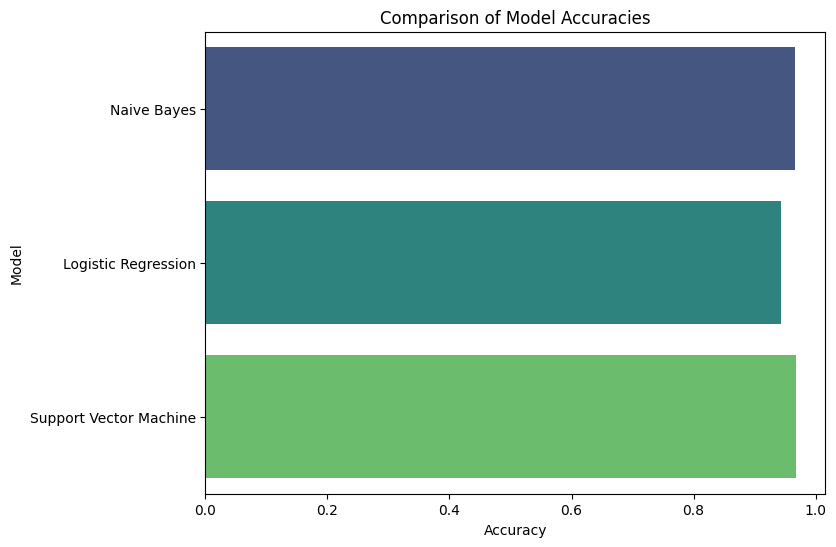

In [15]:
plt.figure(figsize=(8, 6))
sns.barplot(x='Accuracy', y='Model', data=accuracy_comparison, palette='viridis')
plt.title('Comparison of Model Accuracies')
plt.xlabel('Accuracy')
plt.ylabel('Model')
plt.show()